# horror_spooky_eda

## 这部分做最基础的统计特征挖掘

In [1]:
import pandas as pd
filepath = 'C:/Users\Administrator\Desktop/'

In [2]:
train_data = pd.read_csv(filepath+'train.csv')
train_data.head(5)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
train_data.isnull().sum()

id        0
text      0
author    0
dtype: int64

In [5]:
train_data.describe()

,id,text,author
count,19579,19579,19579
unique,19579,19579,3
top,id18000,"""You are in the wrong,"" replied the fiend; ""an...",EAP
freq,1,1,7900


#### 训练集一个有19579条记录，没有缺失值。第一列是unique_id，第二列是一句文本，第三列是作者。作者一共有三个，分别是EAP,HPL和MWS。从frequence来看，训练集中的样本可能是分布不均的。同时，训练集的id有可能可以作为提高模型结果的trick。

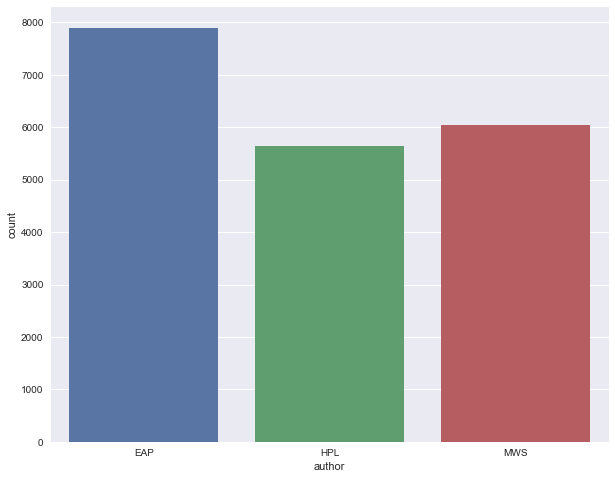

In [3]:
#先确认训练集的样本分布
import matplotlib.pyplot as plt
import seaborn as sns
f = plt.figure(figsize=(10,8))
sns.countplot(train_data.author)
plt.show()

In [9]:
train_data.groupby(train_data.author).id.count()

author
EAP    7900
HPL    5635
MWS    6044
Name: id, dtype: int64

####  不确定这个分布需不需要做调整。接下来看看每个作者写的句子长度有没有差异。

In [33]:
train_data['text_split'] = train_data.text.apply(lambda x:x.split())

In [34]:
train_data['text_len'] = train_data.text_split.apply(lambda x: len(x))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


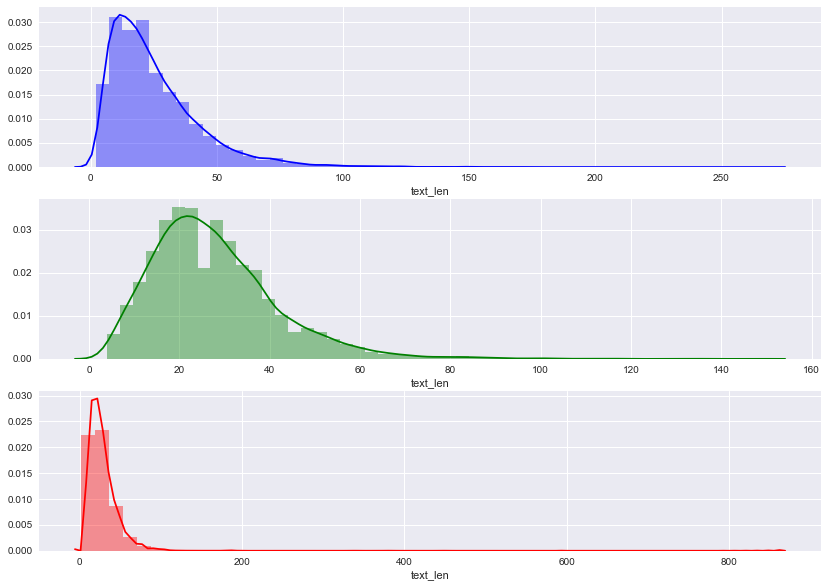

In [12]:
f = plt.figure(figsize=(14,10))
ax1 = f.add_subplot(311)
sns.distplot(train_data[train_data.author=='EAP'].text_len,color='blue',ax=ax1)
ax2 = f.add_subplot(312)
sns.distplot(train_data[train_data.author=='HPL'].text_len,color='green',ax=ax2)
ax3 = f.add_subplot(313)
sns.distplot(train_data[train_data.author=='MWS'].text_len,color='red',ax=ax3)
plt.show()

#### 可以看出超长句子（len>=300）基本可以判断为MWS的句子，也许可以作为一个特征值。但这个超长句子也可能是异常值，还需要看看去除异常值后句子长度的分布差异。同时看到，三个作家的句子长度都是右偏的。这可能是人类写作的一个正常分布？但HPL的左偏程度非常小，可能是HPL的写作方式和别人不一样，打字机、电脑、写字。也许这个特征也可以用起来？

In [13]:
# 先打印所有的超长句子看看,共有五条，全部是MWS
train_data[train_data.text_len>=300]

,id,text,author,text_split,text_len
3956,id20439,To chambers of painted state farewell To midni...,MWS,"[To, chambers, of, painted, state, farewell, T...",377
4184,id20549,As for those who in your world knew not the lo...,MWS,"[As, for, those, who, in, your, world, knew, n...",335
9215,id27184,Diotima approached the fountain seated herself...,MWS,"[Diotima, approached, the, fountain, seated, h...",861
10939,id13677,They are gone for ever great as my power is I ...,MWS,"[They, are, gone, for, ever, great, as, my, po...",445
18107,id17485,Oh no I will become wise I will study my own h...,MWS,"[Oh, no, I, will, become, wise, I, will, study...",594


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


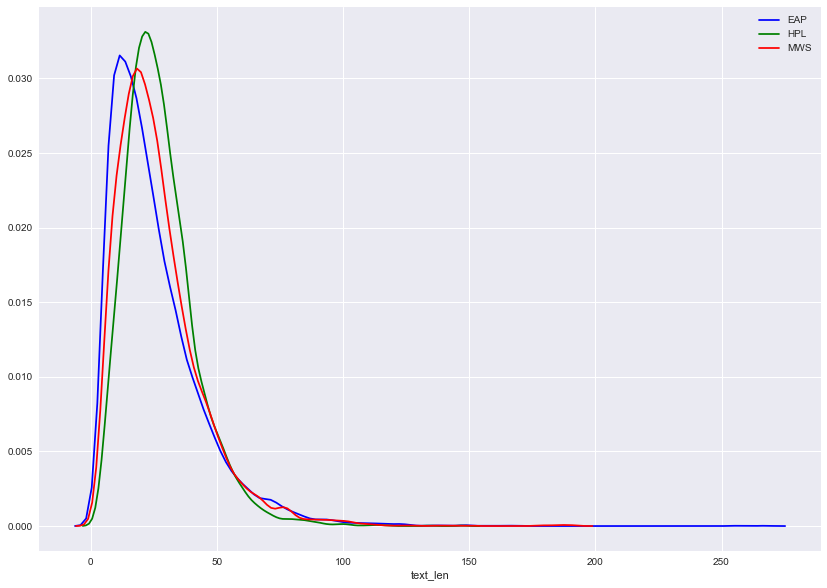

In [14]:
#去除这五条后的分布情况,好像没什么区别
f = plt.figure(figsize=(14,10))
sns.distplot(train_data[(train_data.author=='EAP')&(train_data.text_len<=300)].text_len,color='blue',label='EAP',hist=False)
sns.distplot(train_data[(train_data.author=='HPL')&(train_data.text_len<=300)].text_len,color='green',label='HPL',hist=False)
sns.distplot(train_data[(train_data.author=='MWS')&(train_data.text_len<=300)].text_len,color='red',label='MWS',hist=False)
plt.show()

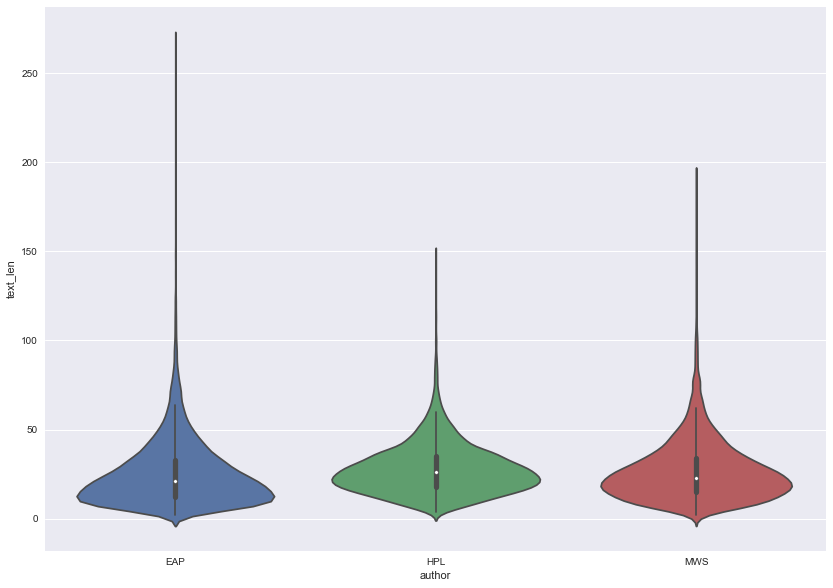

In [15]:
# 这么看可能还是有一些区别的，比如说EAP的句子长度会小一些
f = plt.figure(figsize=(14,10))
sns.violinplot(y=train_data[train_data.text_len<=300].text_len,x=train_data[train_data.text_len<=300].author)
plt.show()

In [16]:
# 再看看每个句子中单词平均长度的是否有显著差异
def mean_length(x):
    l = len(x)
    sum = 0
    for i in x:
        sum+=len(i)
    return sum/l
train_data['word_in_sentence_mean_length'] = train_data.text_split.apply(lambda x:mean_length(x))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


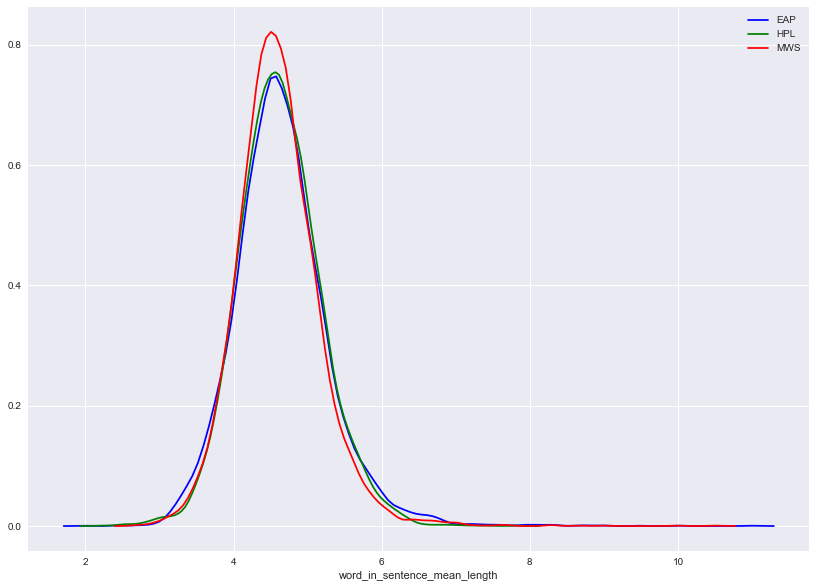

In [17]:
#看起来也很接近
f = plt.figure(figsize=(14,10))
sns.distplot(train_data[(train_data.author=='EAP')].word_in_sentence_mean_length,color='blue',label='EAP',hist=False)
sns.distplot(train_data[(train_data.author=='HPL')].word_in_sentence_mean_length,color='green',label='HPL',hist=False)
sns.distplot(train_data[(train_data.author=='MWS')].word_in_sentence_mean_length,color='red',label='MWS',hist=False)
plt.show()

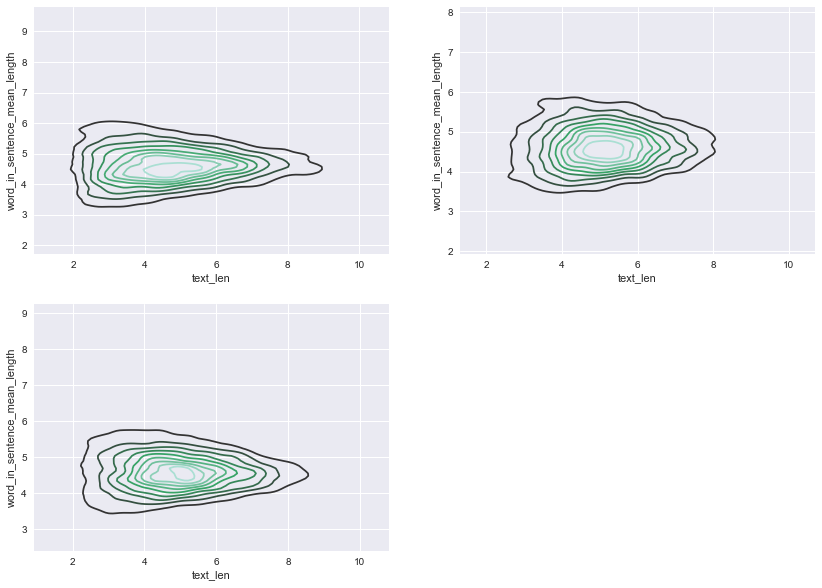

In [18]:
# x=文本长度，y=单词长度，看起来HPL的分布和其余两个作者明显不同
import math
f = plt.figure(figsize=(14,10))
ax1 = f.add_subplot(221)
sns.kdeplot(train_data[(train_data.text_len<=100)&(train_data.author=='EAP')&(train_data.word_in_sentence_mean_length<10)].text_len.apply(lambda x:math.sqrt(x)),train_data[(train_data.text_len<=100)&(train_data.author=='EAP')&(train_data.word_in_sentence_mean_length<10)].word_in_sentence_mean_length,ax=ax1)
ax2 = f.add_subplot(222)
sns.kdeplot(train_data[(train_data.text_len<=100)&(train_data.author=='HPL')&(train_data.word_in_sentence_mean_length<10)].text_len.apply(lambda x:math.sqrt(x)),train_data[(train_data.text_len<=100)&(train_data.author=='HPL')&(train_data.word_in_sentence_mean_length<10)].word_in_sentence_mean_length,ax=ax2)
ax3 = f.add_subplot(223)
sns.kdeplot(train_data[(train_data.text_len<=100)&(train_data.author=='MWS')&(train_data.word_in_sentence_mean_length<10)].text_len.apply(lambda x:math.sqrt(x)),train_data[(train_data.text_len<=100)&(train_data.author=='MWS')&(train_data.word_in_sentence_mean_length<10)].word_in_sentence_mean_length,ax=ax3)
plt.show()

In [19]:
#然后看每个作者对标点符号的使用是否有区别
symbols = [',',"'",'.','!','?']
def sum_symbols(x):
    sum=0
    for i in x:
        if i in symbols:
            sum+=1
    return sum
train_data['symbol_num'] = train_data.text.apply(lambda x:sum_symbols(x))

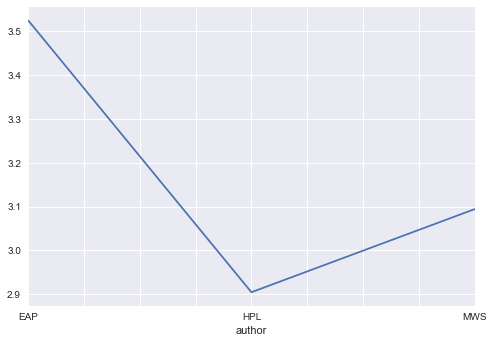

author
EAP    3.205990
HPL    2.814066
MWS    3.001001
Name: symbol_num, dtype: float64

In [24]:
#平均值区别还是挺大的,去掉极值后区别依然很大，但是极值对HPL没有影响
train_data.groupby(train_data.author).symbol_num.mean().plot()
plt.show()
train_data[train_data.symbol_num<=10].groupby(train_data.author).symbol_num.mean()

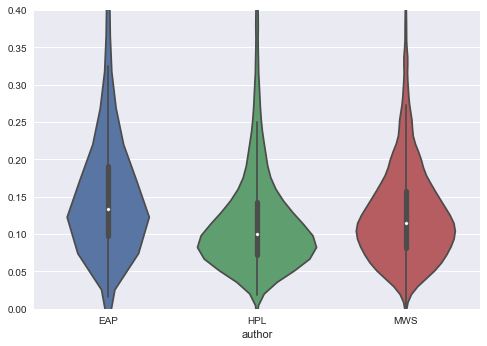

In [37]:
# 上面没有用标点密度，这样可能会手句子长度影响。去除极值后差异不怎么明显
train_data['symbols_density'] = train_data.symbol_num/train_data.text_len
sns.violinplot(y=train_data.symbols_density,x=train_data.author)
plt.ylim(0,0.4)
plt.show()

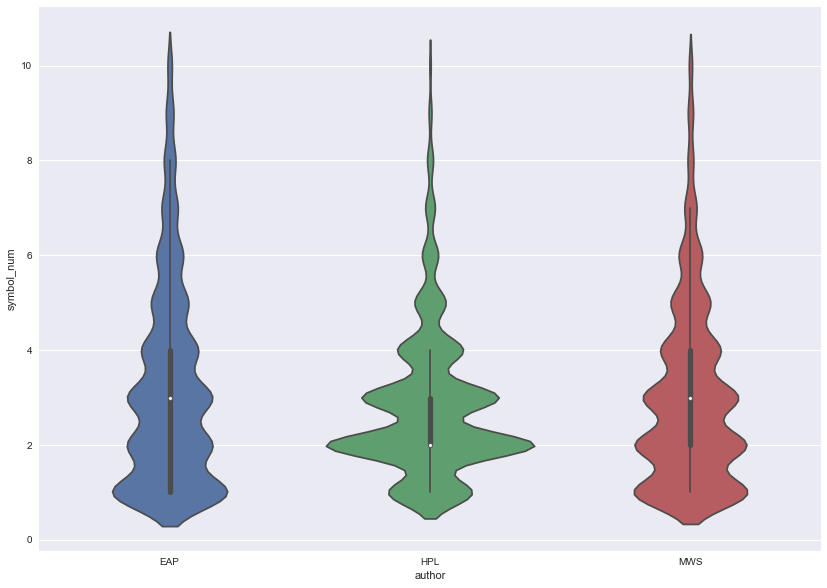

In [21]:
#使用的标点符号数量也许可以作为一个特征
f = plt.figure(figsize=(14,10))
sns.violinplot(x=train_data[train_data.symbol_num<=10].author,y=train_data[train_data.symbol_num<=30].symbol_num)
plt.show()

#### 做了每个标点的密度。发现HPL使用标点符号的习惯明显和其他两个作家不同。问号的频率更低，引号的频率更高。目前想了两种可能，HPL中对话出现的次数更多、或者引用的东西更多，这部分内容可以继续挖掘。

In [23]:
# 然后算每个句子中出现的字符个数

In [24]:
def sum_char(x):
    a = 0
    for i in x:
        a+=len(i)
    return a
train_data['char_num'] = train_data.word_split.apply(lambda x:sum_char(x))

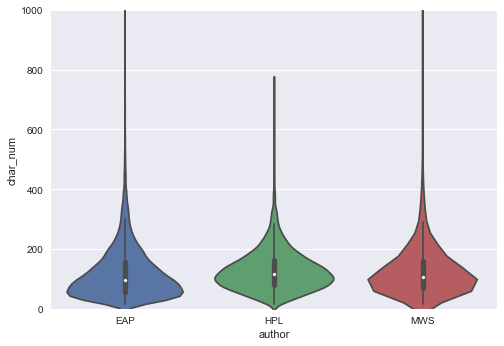

In [30]:
#即便去掉极值（大部分在MWS）之后，还是可以看出EAP的字母数量是比较少的
sns.violinplot(x=train_data.author,y=train_data.char_num)
plt.ylim(0,1000)
plt.show()

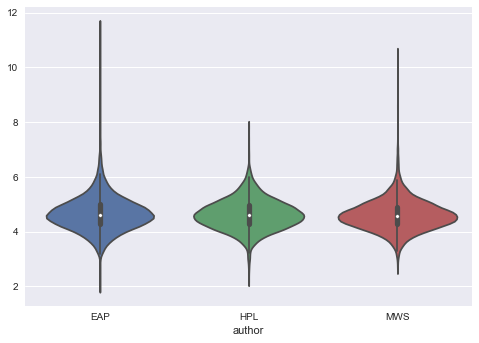

In [37]:
# 不过除以句子平均长度后好像区别就不是很大了
sns.violinplot(x=train_data.author,y=train_data.char_num/train_data.text_len)
plt.show()

In [38]:
# 然后看每个句子中unique_word的出现次数
def unique(x):
    return len(set(x))
train_data['unique'] = train_data.word_split.apply(lambda x:unique(x))

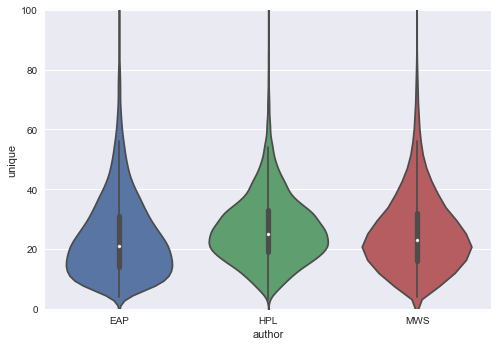

In [43]:
sns.violinplot(x=train_data.author,y=train_data.unique)
plt.ylim(0,100)
plt.show()
# 区别有点大，可以分别EAP和HPL,MWS

In [44]:
# 确实是高度相关的，不知道还要不要这些个特征了
train_data.corr()

,char_num,text_len,unique
char_num,1.000000,0.987247,0.967826
text_len,0.987247,1.000000,0.971522
unique,0.967826,0.971522,1.000000


In [47]:
# 再算算stopword的数量
def stop(x):
    s = 0
    for i in x:
        if i in stopword:
            s+=1
    return s
train_data['stopword'] = train_data.word_split.apply(lambda x:stop(x))

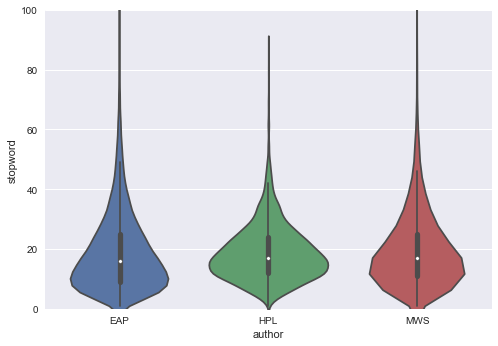

In [50]:
sns.violinplot(x=train_data.author,y=train_data.stopword)
plt.ylim(0,100)
plt.show()
#还是可能和句子长度相关

In [51]:
train_data.corr()

,char_num,text_len,unique,stopword
char_num,1.000000,0.987247,0.967826,0.952260
text_len,0.987247,1.000000,0.971522,0.971715
unique,0.967826,0.971522,1.000000,0.954386
stopword,0.952260,0.971715,0.954386,1.000000


In [27]:
all_word = train_data.text.str.split(expand=True).unstack().value_counts()

In [7]:
all_word[0:50].keys()

Index(['the', 'of', 'and', 'to', 'I', 'a', 'in', 'was', 'that', 'my', 'had',
       'with', 'his', 'as', 'he', 'it', 'for', 'which', 'not', 'at', 'from',
       'by', 'is', 'but', 'on', 'be', 'The', 'were', 'have', 'me', 'this',
       'her', 'all', 'or', 'an', 'no', 'you', 'so', 'been', 'one', 'we',
       'upon', 'could', 'its', 'would', 'when', 'they', 'their', 'more',
       'him'],
      dtype='object')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import math
import numpy as np

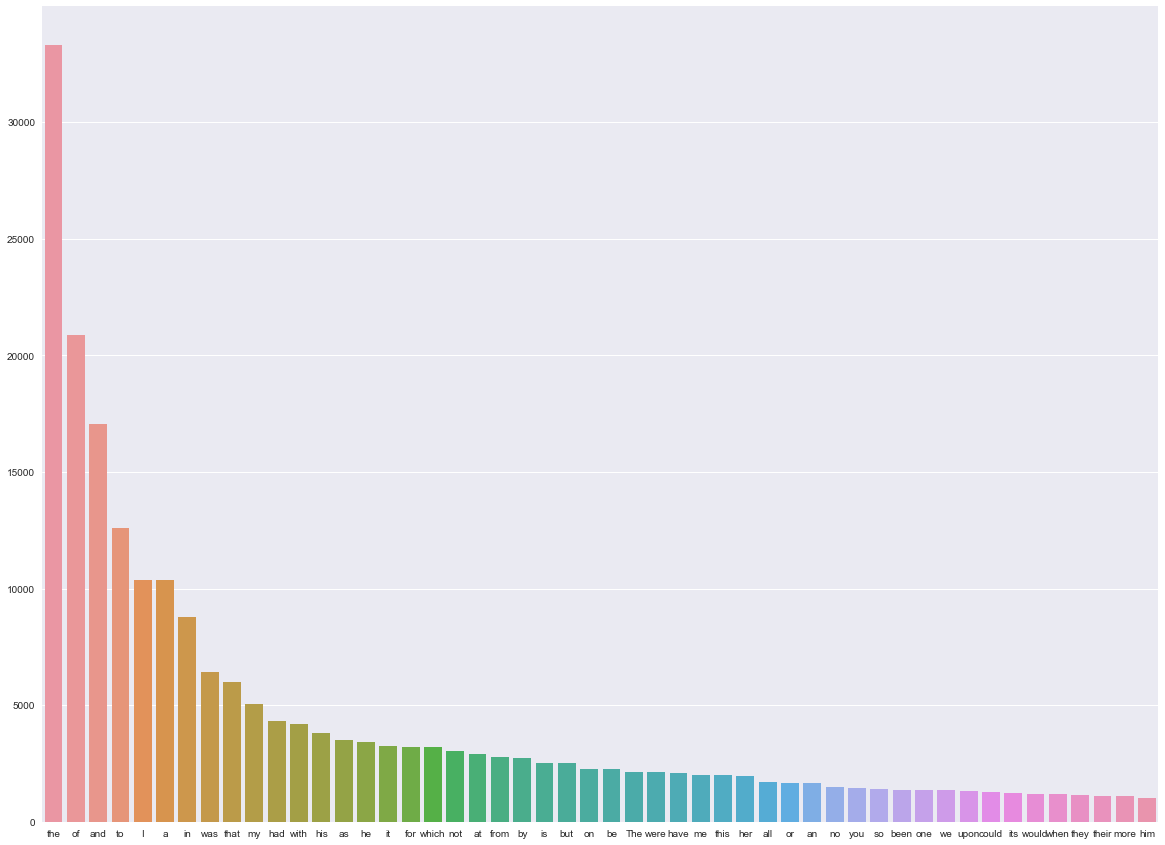

In [15]:
# 在这里没有做任何处理，比如大小写、停用词这些东西f = plt.figure(figsize=(20,15))
sns.barplot(y=all_word[0:50].values,x=all_word[0:50].keys())
plt.show()
f = plt.figure(figsize=(20,15))
sns.barplot(y=all_word[0:50].values,x=all_word[0:50].keys())
plt.show()

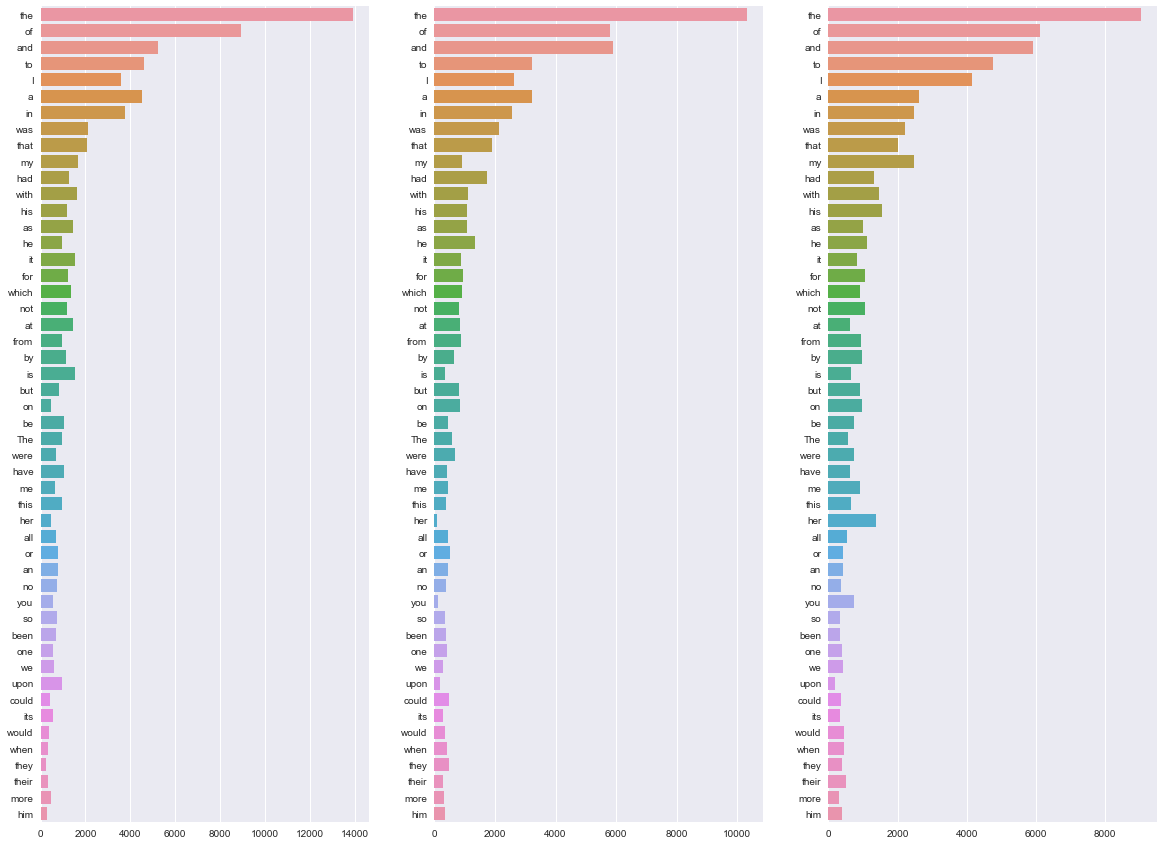

In [16]:
#然后分别看看三个作者，依然没有去掉stopword
#这张图的横坐标是词频，纵坐标是总样本中出现的前五十个word
eap_word = train_data[train_data.author=='EAP'].text.str.split(expand=True).unstack().value_counts()
hpl_word = train_data[train_data.author=='HPL'].text.str.split(expand=True).unstack().value_counts()
mws_word = train_data[train_data.author=='MWS'].text.str.split(expand=True).unstack().value_counts()
f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(131)
sns.barplot(y=all_word[0:50].keys(),x=eap_word[all_word[0:50].keys()],ax=ax1)
ax2 = f.add_subplot(132)
sns.barplot(y=all_word[0:50].keys(),x=hpl_word[all_word[0:50].keys()],ax=ax2)
ax3 = f.add_subplot(133)
sns.barplot(y=all_word[0:50].keys(),x=mws_word[all_word[0:50].keys()],ax=ax3)
plt.show()

# 最好能再多找几个特征出来，因为一把stopwords去掉很多有意思的特征就没了。
****
### 这么看起来好像看不出有什么使用词语上的差异（虽然这么说，但是有些特征还是很明显的，比如说MWS使用her的频次比其他两个作家要高许多，这说明他的作品里面可能会涉及到较多的女性（女性向？）；还有my的频次差异，可能是第一视角作品比较多，感觉MWS在人称me,my,you,her这种东西上频次明显高出不少）。
### 接下来去掉一些stopwords后再来做这个操作。然后我们就要开始使用nltk这个包了，使用nltk后也可以减小前面几部分词中的误差。

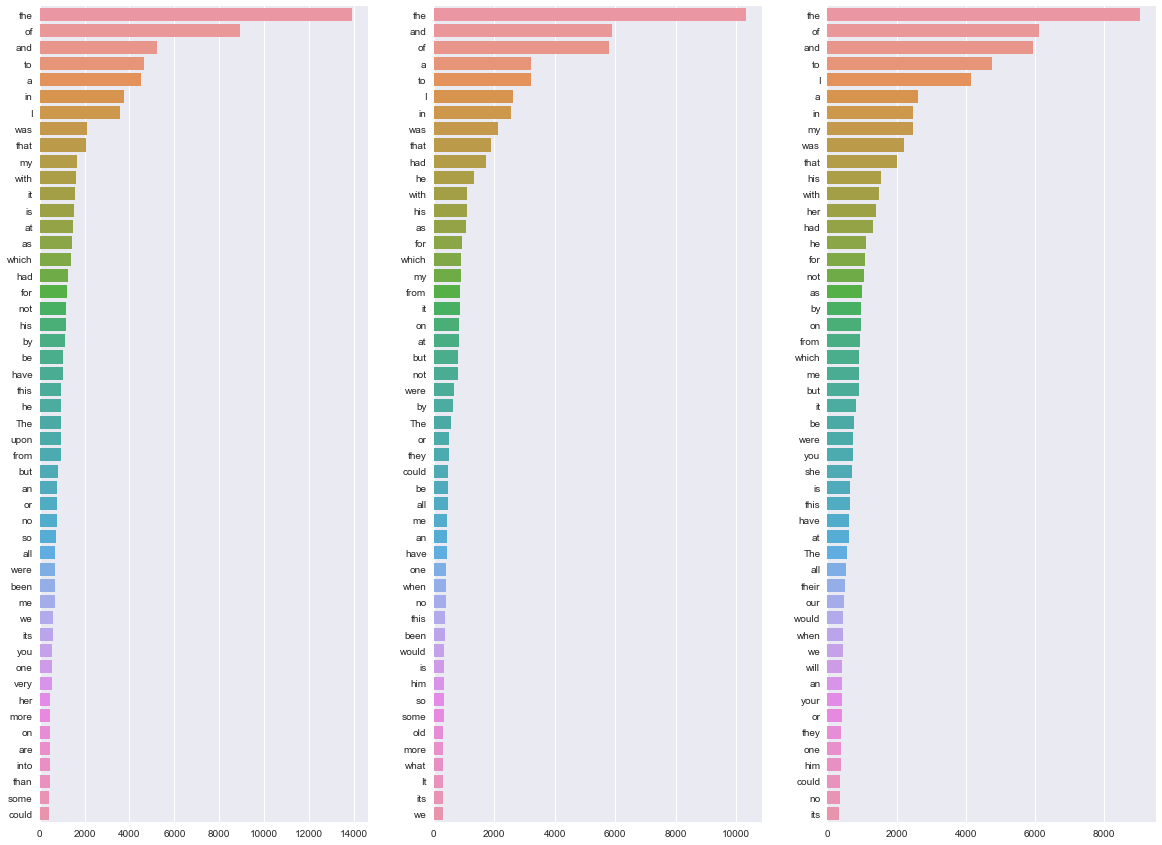

In [42]:
# 这张图的横坐标是词频，纵坐标是每个作家文本中频率最高的50个word,所以可以看一下和上图有什么区别。看看每个作家有
# 没有什么特殊的用词习惯
f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(131)
sns.barplot(y=eap_word[0:50].keys(),x=eap_word[0:50].values,ax=ax1)
ax2 = f.add_subplot(132)
sns.barplot(y=hpl_word[0:50].keys(),x=hpl_word[0:50].values,ax=ax2)
ax3 = f.add_subplot(133)
sns.barplot(y=mws_word[0:50].keys(),x=mws_word[0:50].values,ax=ax3)
plt.show()

In [4]:
import nltk

###  遇到一个问题，anaconda提供的nltk都过时了，需要用nltk.download()更新

In [5]:
train_data['word_split'] = train_data.text.apply(lambda x:nltk.word_tokenize(str(x)))

In [19]:
def not_in_sentence(x):
    for i in x:
        if i=='not'or i==' not' or i=='not ':return 1
    else:return 0
train_data['not_in_sentence'] = train_data.word_split.apply(lambda x:not_in_sentence(x))

In [21]:
train_data.groupby(train_data.author).sum()

,not_in_sentence
author,
EAP,1185
HPL,819
MWS,1010


In [5]:
train_data['word_tag'] = train_data.word_split.apply(lambda x:nltk.pos_tag(x))

In [16]:
def get_tag(x):
    a = ''
    for i in x:
        a = a+i[1]+' '
    return a
train_data['tag'] = train_data.word_tag.apply(lambda x:get_tag(x))

In [23]:
all_tag = train_data.tag.str.split(expand=True).unstack().value_counts()

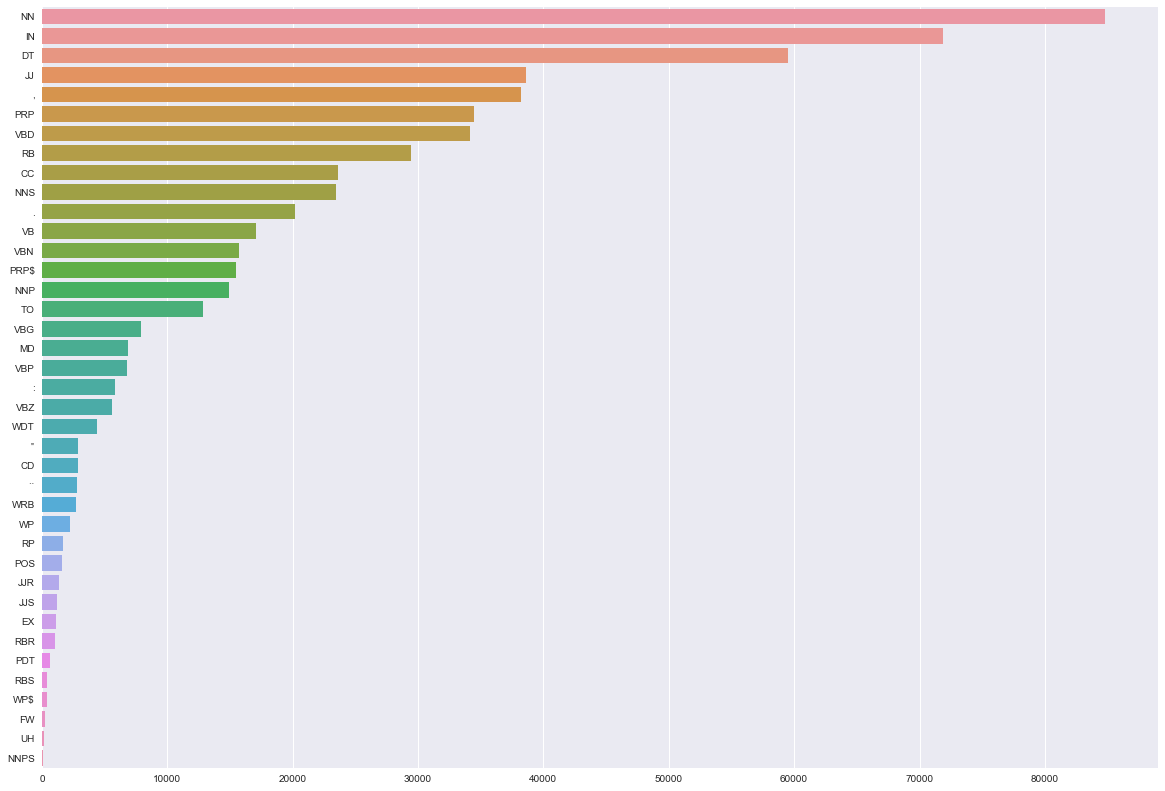

In [29]:
f = plt.figure(figsize=(20,14))
sns.barplot(x=all_tag.values,y=all_tag.keys())
plt.show()

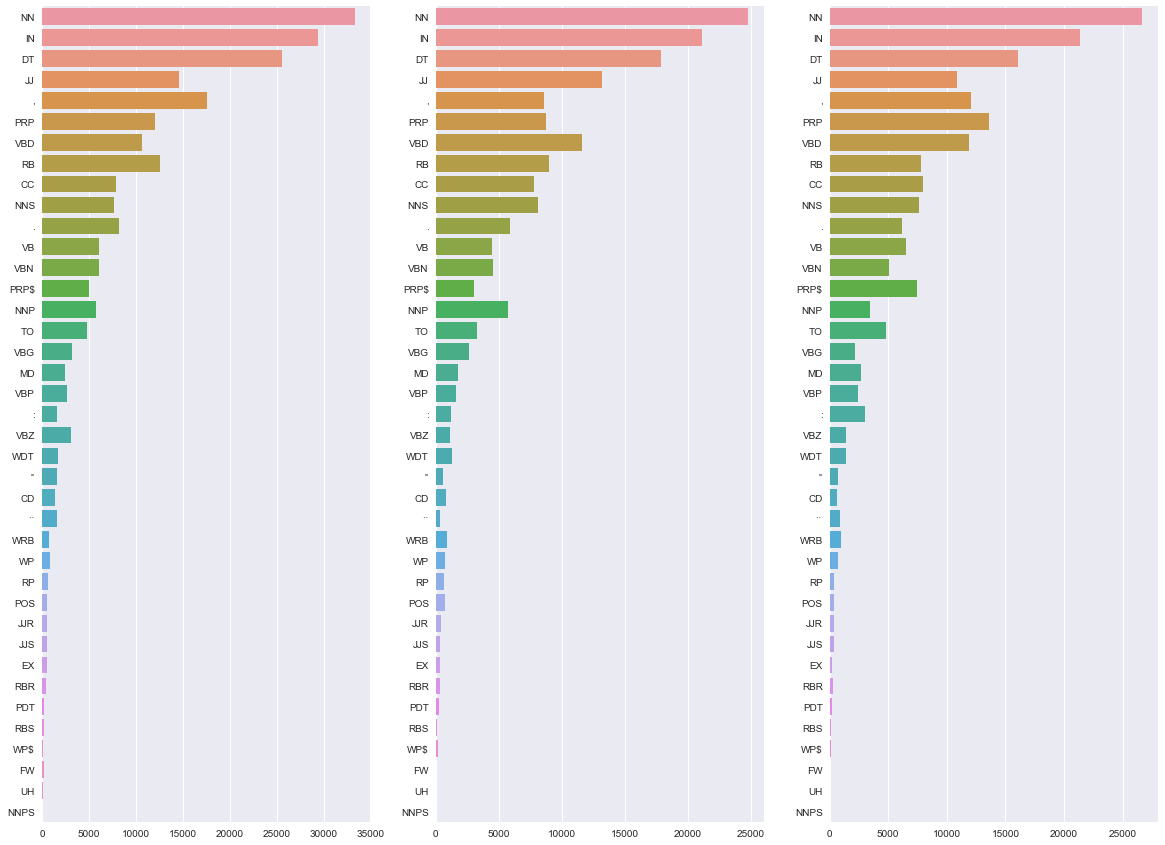

In [30]:
eap_tag = train_data[train_data.author=='EAP'].tag.str.split(expand=True).unstack().value_counts()
hpl_tag = train_data[train_data.author=='HPL'].tag.str.split(expand=True).unstack().value_counts()
mws_tag = train_data[train_data.author=='MWS'].tag.str.split(expand=True).unstack().value_counts()
f = plt.figure(figsize=(20,15))
ax1 = f.add_subplot(131)
sns.barplot(y=all_tag.keys(),x=eap_tag[all_tag.keys()],ax=ax1)
ax2 = f.add_subplot(132)
sns.barplot(y=all_tag.keys(),x=hpl_tag[all_tag.keys()],ax=ax2)
ax3 = f.add_subplot(133)
sns.barplot(y=all_tag.keys(),x=mws_tag[all_tag.keys()],ax=ax3)
plt.show()

### 做了一个不同词性词语的整体使用情况，具体的词语内容在另一篇notebook中分析了。还是可以看出一些特征：FW和UH好像只在EAP里出现过；MWS很喜欢用冒号（可能和上面引号的使用差不多）；JJ和逗号之间的相对关系,VB和VBN之间的相对关系可能是个特征；PRP,PRP（dollor）,NNP的使用频率也不一样

###  接下来我要去掉stopwords，nltk自带的stopwords库效果好像不太好。

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 

In [19]:
stopword_file = 'C:/Users\Administrator\Desktop/stopword.txt'

In [21]:
stopword = stopwords.words()
stopword.append('.')
stopword.append(',')
stopword.append('?')
stopword.append(':')
stopword.append("'")
stopword.append(';')
stopword.append('"')
stopword.append('``')
stopword.append("''")
stopword.append('one')
stopword.append("'s")
for i in b:
    stopword.append(i)

In [22]:
#先全部转成小写形式、词根形式，在把stopwords去掉
#可能做一些定冠词的分析的时候不用自己做词性标注，直接看stopwords也可以
def fliter_(x):
    a = ''
    for i in x:
        if i.lower() not in stopword and WordNetLemmatizer().lemmatize(i) not in stopword and PorterStemmer().stem(i)not in stopword:
            a = a+i+' '
    return a
train_data['word_filter'] = train_data.word_split.apply(lambda x:fliter_(x))

In [69]:
all_word_filter = train_data.word_filter.str.split(expand=True).unstack().value_counts()

In [70]:
all_word_filter[0:5].keys()

Index(['time', 'life', 'night', 'eyes', 'day'], dtype='object')

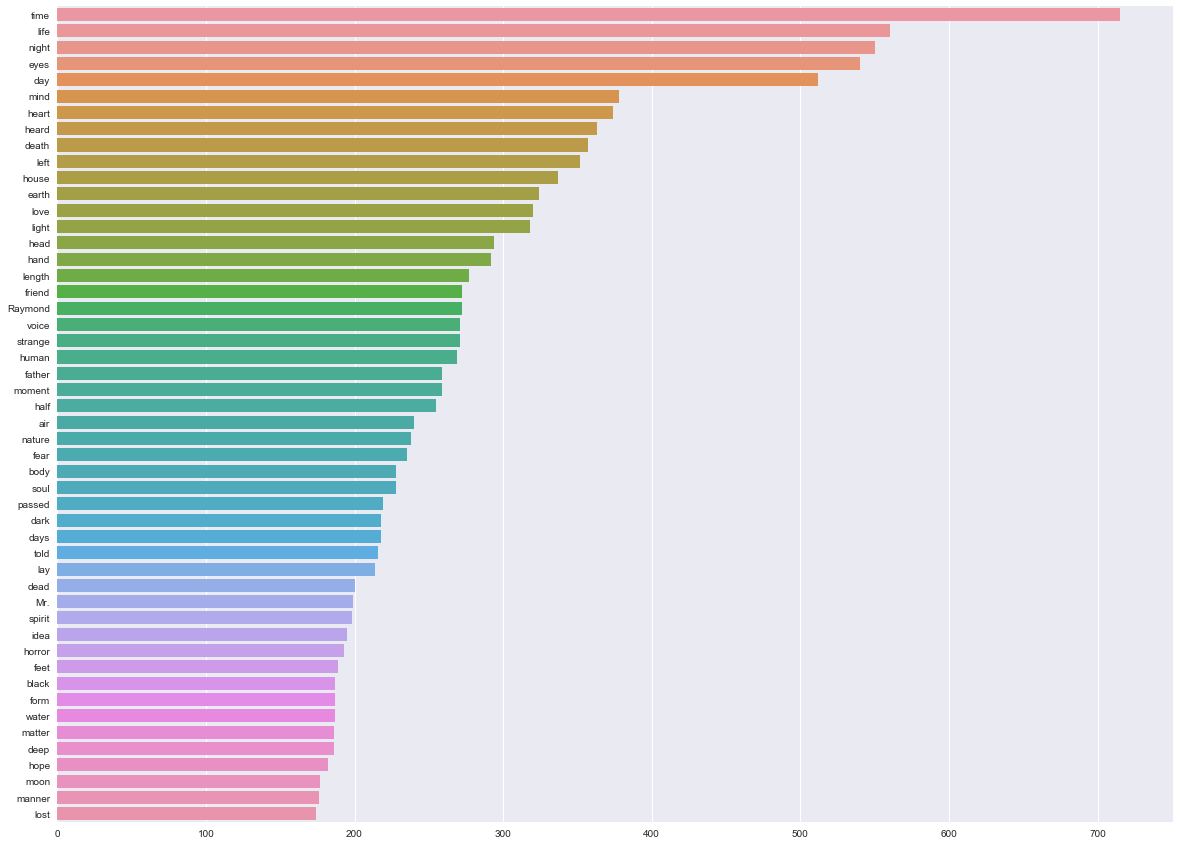

In [71]:
# 这里对词频做了开方处理
f = plt.figure(figsize=(20,15))
sns.barplot(x=(all_word_filter[0:50].values),y=all_word_filter[0:50].keys())
plt.show()

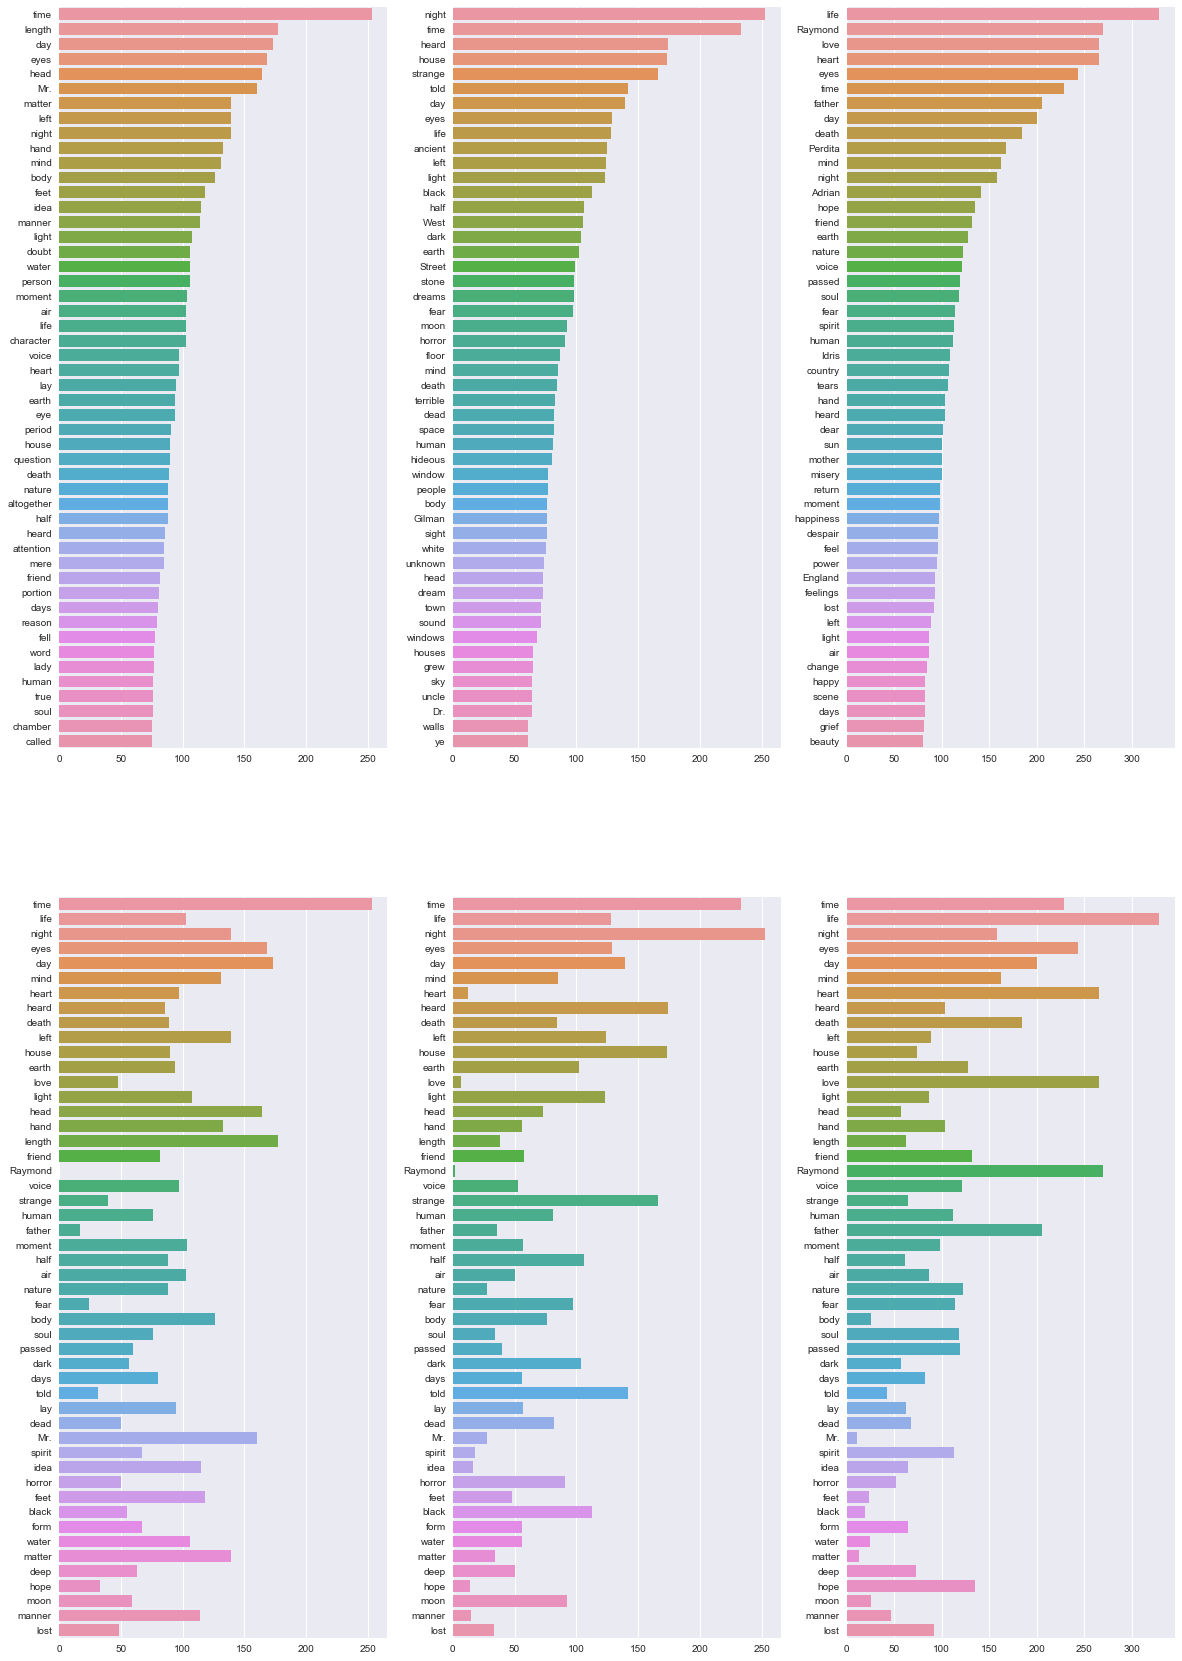

In [72]:
eap_word_filter_ = train_data[train_data.author=='EAP'].word_filter.str.split(expand=True).unstack().value_counts()
hpl_word_filter = train_data[train_data.author=='HPL'].word_filter.str.split(expand=True).unstack().value_counts()
mws_word_filter = train_data[train_data.author=='MWS'].word_filter.str.split(expand=True).unstack().value_counts()
f = plt.figure(figsize=(20,30))
ax1 = f.add_subplot(231)
sns.barplot(y=eap_word_filter_[0:50].keys(),x=eap_word_filter_[0:50].values,ax=ax1)
ax2 = f.add_subplot(232)
sns.barplot(y=hpl_word_filter[0:50].keys(),x=hpl_word_filter[0:50].values,ax=ax2)
ax3 = f.add_subplot(233)
sns.barplot(y=mws_word_filter[0:50].keys(),x=mws_word_filter[0:50].values,ax=ax3)
ax4 = f.add_subplot(234)
sns.barplot(y=all_word_filter[0:50].keys(),x=eap_word_filter_[all_word_filter[0:50].keys()],ax=ax4)
ax5 = f.add_subplot(235)
sns.barplot(y=all_word_filter[0:50].keys(),x=hpl_word_filter[all_word_filter[0:50].keys()],ax=ax5)
ax6 = f.add_subplot(236)
sns.barplot(y=all_word_filter[0:50].keys(),x=mws_word_filter[all_word_filter[0:50].keys()],ax=ax6)
plt.show()

###  粗粗一看，有些关键词是完全可以当做判断作者的特征的。比如当作品中出现Raymond,Perdita这两个人名、或者地名的时候，就可以直接判断作者是MWS。更多的特征等待挖掘。

###  接下来要基于TF-IDF再看看这些作者在用词上的差距。

In [5]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [6]:
vectorizer = TfidfVectorizer()
vectorizer.fit(train_data.text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [7]:
eap_tfidf = ''
for i in train_data[train_data.author=='EAP'].word_filter:
    eap_tfidf = eap_tfidf+i+' '
hpl_tfidf = ''
for i in train_data[train_data.author=='HPL'].word_filter:
    hpl_tfidf = hpl_tfidf+i+' '
mws_tfidf = ''
for i in train_data[train_data.author=='MWS'].word_filter:
    mws_tfidf = mws_tfidf+i+' '
all_tfidf = [eap_tfidf,hpl_tfidf,mws_tfidf]

AttributeError: 'DataFrame' object has no attribute 'word_filter'

In [8]:
vectorizer = TfidfVectorizer()
vectorizer.fit(all_tfidf)

NameError: name 'all_tfidf' is not defined

In [77]:
eap_tfidf_result = vectorizer.transform([eap_tfidf]).toarray()

In [78]:
hpl_tfidf_result = vectorizer.transform([hpl_tfidf]).toarray()
mws_tfidf_result = vectorizer.transform([mws_tfidf]).toarray()

In [79]:
word_list = vectorizer.get_feature_names()

In [80]:
def get_tfidf_value_key(x):
    x = x.tolist()
    a = [[],[]]
    for j in range(50):
        index = x.index(max(x))
        value = max(x)
        a[0].append(word_list[index])
        a[1].append(value)
        x[index] = 0
    return a
    
eap_tfidf_word = get_tfidf_value_key(eap_tfidf_result[0])
hpl_tfidf_word = get_tfidf_value_key(hpl_tfidf_result[0])
mws_tfidf_word = get_tfidf_value_key(mws_tfidf_result[0])

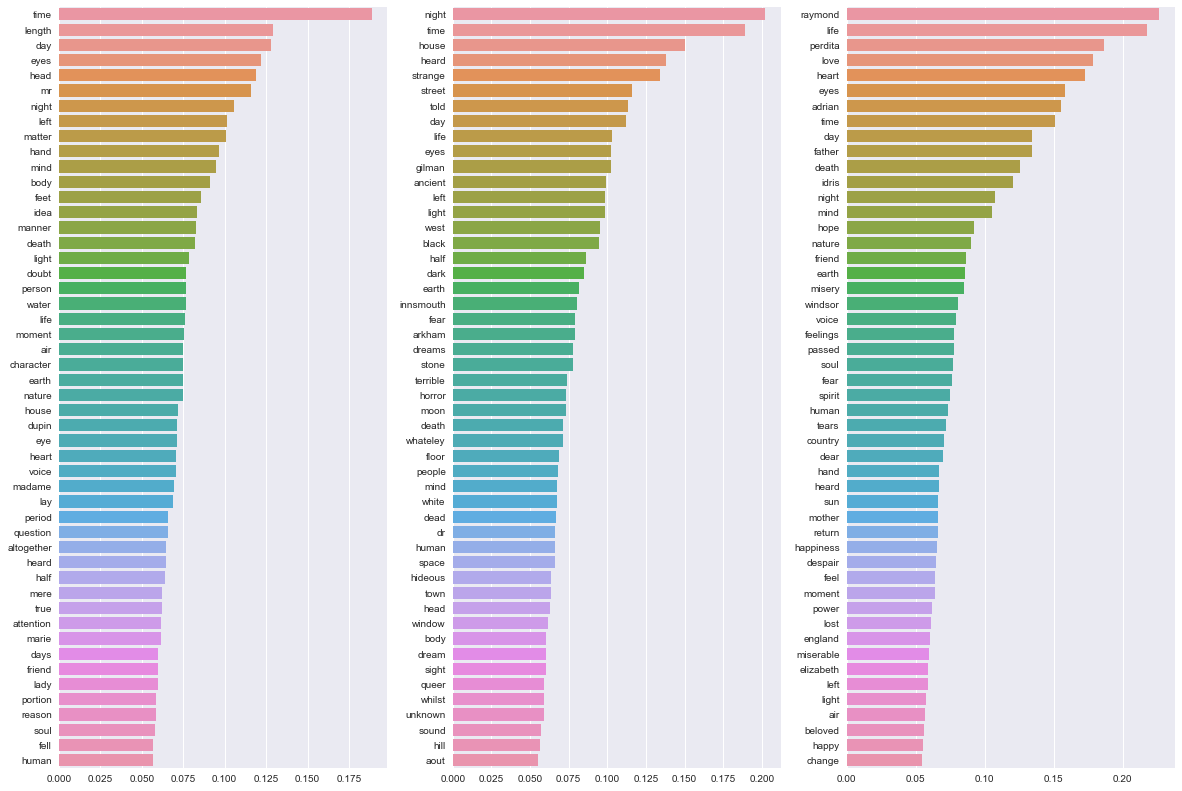

In [81]:
f = plt.figure(figsize=(20,14))
ax1 = f.add_subplot(131)
sns.barplot(y=eap_tfidf_word[0],x=eap_tfidf_word[1],ax=ax1)
ax2 = f.add_subplot(132)
sns.barplot(y=hpl_tfidf_word[0],x=hpl_tfidf_word[1],ax=ax2)
ax3 = f.add_subplot(133)
sns.barplot(y=mws_tfidf_word[0],x=mws_tfidf_word[1],ax=ax3)
plt.show()

### 用tf-idf可以更直接看出每个作者使用了那些独有的词汇。用了csdn上共享的stopword库，比nltk自带的停用词库效果好像要好一点

###  关于怎么用这个tf-idf结果：目前有三种思路，第一是挑选前n个做onehot，第二种是用全部tfidf词做onehot，然后放到模型里训练，用得到的结果做最后的训练，第三种是我在一篇kernel里看到的，用的是SVD把这个矩阵降维后放到模型中训练。看起来第三种的结果最不错，我们也可以尝试一下这么做。

### 然后我要做n-gram分析，陈熹三三说给我们个神经网络代码来做ngram，这部分可以暂时放一下。

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [15]:
stopword.append('I')
stopword.append('i')
stopword.remove('ha')
stopword.append('...')
def lem(x):
    a = []
    for i in x:
        i = i.lower()
        if i not in stopword:
            a.append(i)
    return a
train_data['word_split_2'] = train_data.word_split.apply(lambda x:lem(x))

In [18]:
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures

In [78]:
eap_word_list_2gram = []
hpl_word_list_2gram = []
mws_word_list_2gram = []
for i in train_data[train_data.author=='EAP'].word_split_2:
    for j in i:
        eap_word_list_2gram.append(j)
for i in train_data[train_data.author=='HPL'].word_split_2:
    for j in i:
        hpl_word_list_2gram.append(j)
for i in train_data[train_data.author=='MWS'].word_split_2:
    for j in i:
        mws_word_list_2gram.append(j)

In [79]:
eap_bcf = BigramCollocationFinder.from_words(eap_word_list_2gram)
hpl_bcf = BigramCollocationFinder.from_words(hpl_word_list_2gram)
mws_bcf = BigramCollocationFinder.from_words(mws_word_list_2gram)

In [81]:
eap_a = list(eap_bcf.score_ngrams(BigramAssocMeasures.chi_sq))
hpl_a = list(hpl_bcf.score_ngrams(BigramAssocMeasures.chi_sq))
mws_a = list(mws_bcf.score_ngrams(BigramAssocMeasures.chi_sq))

In [82]:
def get_value(x):
    b = []
    for i in x:
        b.append(i[1])
    return b
eap_b = get_value(eap_a)
hpl_b = get_value(hpl_a)
mws_b = get_value(mws_a)

In [103]:
def get_max_50(b,a):
    c = [[],[]]
    for i in range(50):
        c[0].append(a[b.index(min(b))][0][0]+'-'+a[b.index(min(b))][0][1])
        c[1].append(a[b.index(min(b))][1])
        b[b.index(min(b))]=191653
    return c
eap_c = get_max_50(eap_b,eap_a)
hpl_c = get_max_50(hpl_b,hpl_a)
mws_c = get_max_50(mws_b,mws_a)

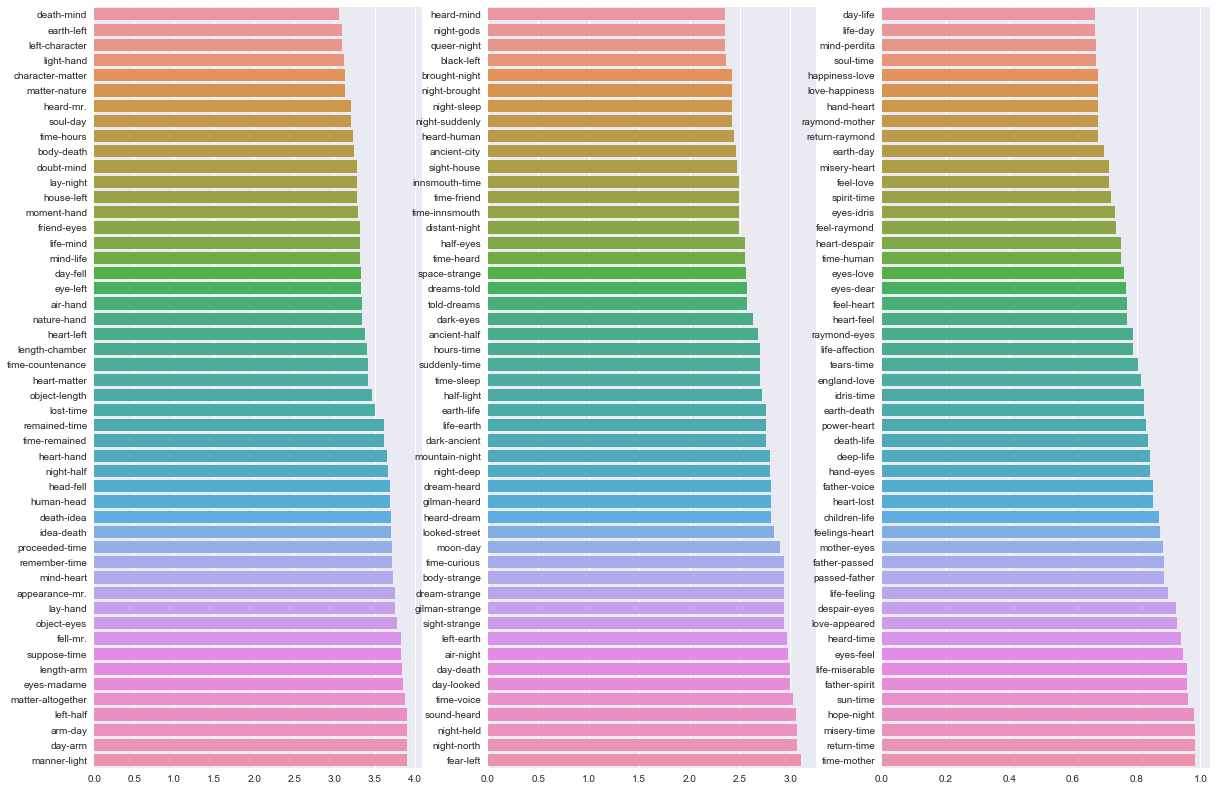

In [105]:
f = plt.figure(figsize=(20,14))
ax1 = f.add_subplot(131)
sns.barplot(y=eap_c[0],x=eap_c[1],ax=ax1)
ax2 = f.add_subplot(132)
sns.barplot(y=hpl_c[0],x=hpl_c[1],ax=ax2)
ax3 = f.add_subplot(133)
sns.barplot(y=mws_c[0],x=mws_c[1],ax=ax3)
plt.show()

### 上面这个图是内置的bigram，它的基本意思是如果两个词在文本中的频率相同，就可能是一个词组。这个算法的好坏直接决定分词的结果好坏，这里我不知道有没有用。所以只做一个bigram，threegram暂时不做了。

In [322]:
def two_gram(x):
    a = ''
    for i in range(1,len(x)):
        a = a+x[i-1]+'-'+x[i]+' '
    return a
train_data['two_gram'] = train_data.word_split_2.apply(lambda x:two_gram(x))

In [323]:
# all_2_gram = train_data.two_gram.str.split(expand=True).unstack().value_counts()
# eap_2_gram = train_data[train_data.author=='EAP'].two_gram.str.split(expand=True).unstack().value_counts()
# hpl_2_gram = train_data[train_data.author=='HPL'].two_gram.str.split(expand=True).unstack().value_counts()
# mws_2_gram = train_data[train_data.author=='MWS'].two_gram.str.split(expand=True).unstack().value_counts()

In [324]:
vectorize = TfidfVectorizer(token_pattern=r'.*?-.*?\s')

In [325]:
eap_2_gram_corpus = ''
for i in train_data[train_data.author=='EAP'].two_gram:
    eap_2_gram_corpus = eap_2_gram_corpus+i+' '

In [326]:
hpl_2_gram_corpus = ''
for i in train_data[train_data.author=='HPL'].two_gram:
    hpl_2_gram_corpus = hpl_2_gram_corpus+i+' '
mws_2_gram_corpus = ''
for i in train_data[train_data.author=='MWS'].two_gram:
    mws_2_gram_corpus = mws_2_gram_corpus+i+' '

In [327]:
vectorize.fit([eap_2_gram_corpus,hpl_2_gram_corpus,mws_2_gram_corpus])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='.*?-.*?\\s', tokenizer=None, use_idf=True,
        vocabulary=None)

In [328]:
eap_2gram_tfid = vectorize.transform([eap_2_gram_corpus]).toarray()

In [329]:
hpl_2gram_tfid = vectorize.transform([hpl_2_gram_corpus]).toarray()
mws_2gram_tfid = vectorize.transform([mws_2_gram_corpus]).toarray()

In [330]:
len(eap_2gram_tfid[0])

173642

In [331]:
word_list = vectorize.get_feature_names()
def get_tfidf_value_key(x):
    x = x.tolist()
    a = [[],[]]
    for j in range(50):
        index = x.index(max(x))
        value = max(x)
        a[0].append(word_list[index])
        a[1].append(value)
        x[index] = 0
    return a
    
eap_tfidf_word = get_tfidf_value_key(eap_2gram_tfid[0])
hpl_tfidf_word = get_tfidf_value_key(hpl_2gram_tfid[0])
mws_tfidf_word = get_tfidf_value_key(mws_2gram_tfid[0])

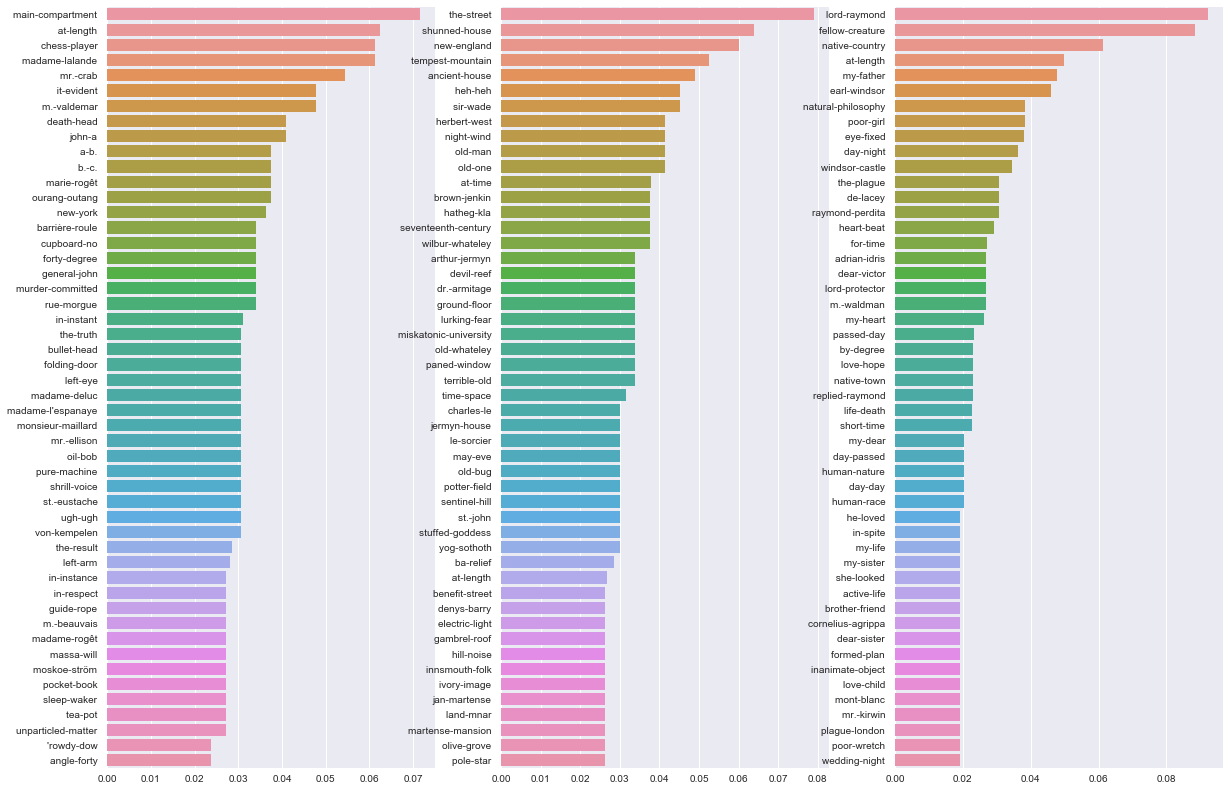

In [332]:
f = plt.figure(figsize=(20,14))
ax1 = f.add_subplot(131)
sns.barplot(y=eap_tfidf_word[0],x=eap_tfidf_word[1],ax=ax1)
ax2 = f.add_subplot(132)
sns.barplot(y=hpl_tfidf_word[0],x=hpl_tfidf_word[1],ax=ax2)
ax3 = f.add_subplot(133)
sns.barplot(y=mws_tfidf_word[0],x=mws_tfidf_word[1],ax=ax3)
plt.show()

### 2gram的一些特征还是很明显的，比如说HPL喜欢用呵呵（heh-heh）,EAP经常用一个chess player的故事，MWS喜欢讲my-father。更多的特征有待发掘。

###  接下来做一下3gram和4gram

In [333]:
def three_gram(x):
    a = ''
    for i in range(2,len(x)):
        a = a+x[i-2]+'-'+x[i-1]+'-'+x[i]+' '
    return a
train_data['three_gram'] = train_data.word_split_2.apply(lambda x:three_gram(x))

In [334]:
vectorize = TfidfVectorizer(token_pattern=r'.*?-.*?-.*?\s')
eap_3_gram_corpus = ''
for i in train_data[train_data.author=='EAP'].three_gram:
    eap_3_gram_corpus = eap_3_gram_corpus+i+' '
hpl_3_gram_corpus = ''
for i in train_data[train_data.author=='HPL'].three_gram:
    hpl_3_gram_corpus = hpl_3_gram_corpus+i+' '
mws_3_gram_corpus = ''
for i in train_data[train_data.author=='MWS'].three_gram:
    mws_3_gram_corpus = mws_3_gram_corpus+i+' '

In [335]:
vectorize.fit([eap_3_gram_corpus,hpl_3_gram_corpus,mws_3_gram_corpus])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='.*?-.*?-.*?\\s', tokenizer=None, use_idf=True,
        vocabulary=None)

In [336]:
eap_3gram_tfid = vectorize.transform([eap_3_gram_corpus]).toarray()
hpl_3gram_tfid = vectorize.transform([hpl_3_gram_corpus]).toarray()
mws_3gram_tfid = vectorize.transform([mws_3_gram_corpus]).toarray()

In [337]:
word_list = vectorize.get_feature_names()
def get_tfidf_value_key(x):
    x = x.tolist()
    a = [[],[]]
    for j in range(50):
        index = x.index(max(x))
        value = max(x)
        a[0].append(word_list[index])
        a[1].append(value)
        x[index] = 0
    return a
    
eap_tfidf_word = get_tfidf_value_key(eap_3gram_tfid[0])
hpl_tfidf_word = get_tfidf_value_key(hpl_3gram_tfid[0])
mws_tfidf_word = get_tfidf_value_key(mws_3gram_tfid[0])

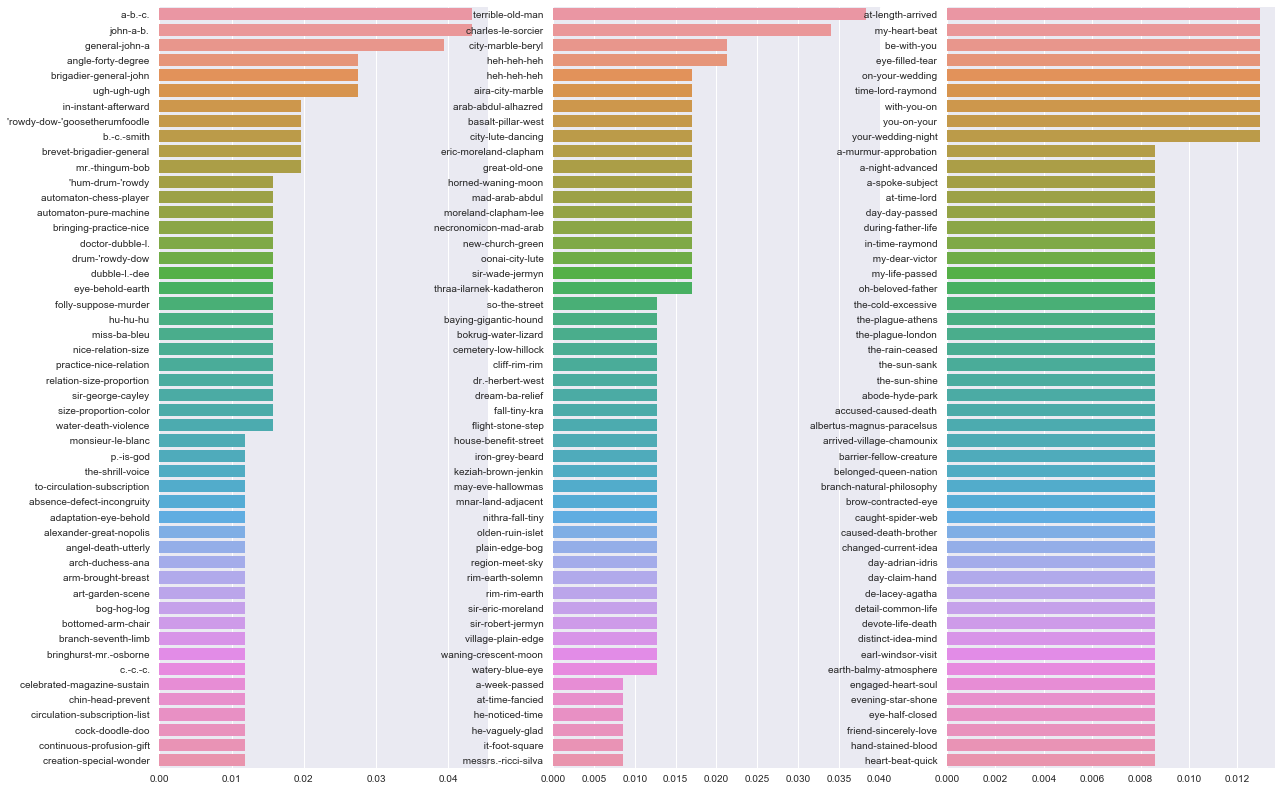

In [338]:
f = plt.figure(figsize=(20,14))
ax1 = f.add_subplot(131)
sns.barplot(y=eap_tfidf_word[0],x=eap_tfidf_word[1],ax=ax1)
ax2 = f.add_subplot(132)
sns.barplot(y=hpl_tfidf_word[0],x=hpl_tfidf_word[1],ax=ax2)
ax3 = f.add_subplot(133)
sns.barplot(y=mws_tfidf_word[0],x=mws_tfidf_word[1],ax=ax3)
plt.show()

In [340]:
def four_gram(x):
    a = ''
    for i in range(3,len(x)):
        a = a+x[i-3]+'-'+x[i-2]+'-'+x[i-1]+'-'+x[i]+' '
    return a
train_data['four_gram'] = train_data.word_split_2.apply(lambda x:four_gram(x))

In [341]:
vectorize = TfidfVectorizer(token_pattern=r'.*?-.*?-.*?-.*?\s')
eap_4_gram_corpus = ''
for i in train_data[train_data.author=='EAP'].four_gram:
    eap_4_gram_corpus = eap_3_gram_corpus+i+' '
hpl_4_gram_corpus = ''
for i in train_data[train_data.author=='HPL'].four_gram:
    hpl_4_gram_corpus = hpl_3_gram_corpus+i+' '
mws_4_gram_corpus = ''
for i in train_data[train_data.author=='MWS'].four_gram:
    mws_4_gram_corpus = mws_3_gram_corpus+i+' '

In [342]:
vectorize.fit([eap_4_gram_corpus,hpl_4_gram_corpus,mws_4_gram_corpus])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='.*?-.*?-.*?-.*?\\s', tokenizer=None, use_idf=True,
        vocabulary=None)

In [343]:
eap_4gram_tfid = vectorize.transform([eap_4_gram_corpus]).toarray()
hpl_4gram_tfid = vectorize.transform([hpl_4_gram_corpus]).toarray()
mws_4gram_tfid = vectorize.transform([mws_4_gram_corpus]).toarray()

In [344]:
word_list = vectorize.get_feature_names()
def get_tfidf_value_key(x):
    x = x.tolist()
    a = [[],[]]
    for j in range(50):
        index = x.index(max(x))
        value = max(x)
        a[0].append(word_list[index])
        a[1].append(value)
        x[index] = 0
    return a
    
eap_tfidf_word = get_tfidf_value_key(eap_4gram_tfid[0])
hpl_tfidf_word = get_tfidf_value_key(hpl_4gram_tfid[0])
mws_tfidf_word = get_tfidf_value_key(mws_4gram_tfid[0])

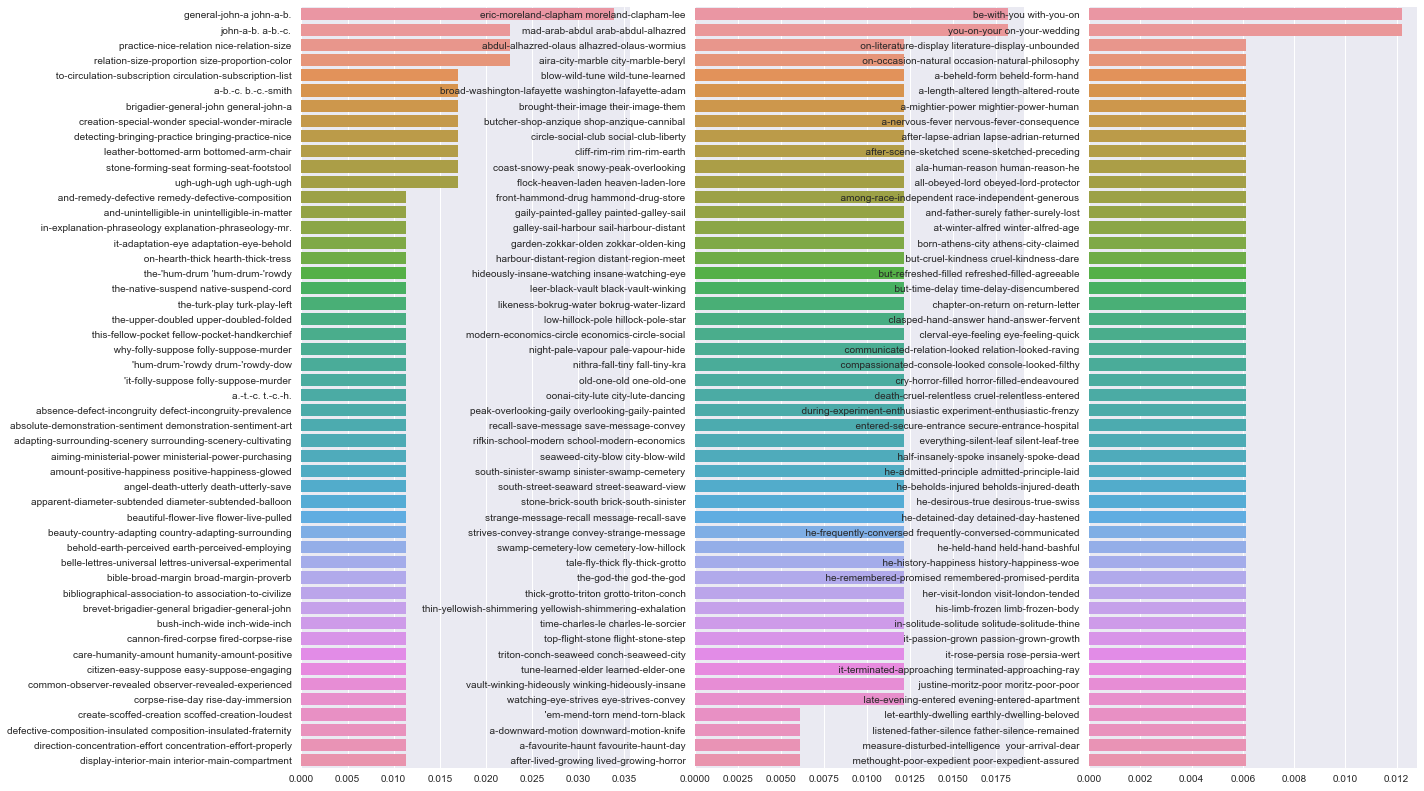

In [345]:
f = plt.figure(figsize=(20,14))
ax1 = f.add_subplot(131)
sns.barplot(y=eap_tfidf_word[0],x=eap_tfidf_word[1],ax=ax1)
ax2 = f.add_subplot(132)
sns.barplot(y=hpl_tfidf_word[0],x=hpl_tfidf_word[1],ax=ax2)
ax3 = f.add_subplot(133)
sns.barplot(y=mws_tfidf_word[0],x=mws_tfidf_word[1],ax=ax3)
plt.show()

### 4gram的效果不好，但是看3gram还是能看出一些很关键的信息，比如说on your wedding，my heat beat这些MWS非常喜欢用的词组。更多特征等待挖掘。

### 接下来要做的是情感分析

In [57]:
from textblob import TextBlob

In [23]:
train_data['sentence_sentiment'] = train_data.text.apply(lambda x:TextBlob(x).sentiment[0])

In [24]:
# 先做一整个句子的情感分析，用了textblob，效果好像不太好，很多句子都是中性的。5280/19579
train_data.describe()

,not_in_sentence,sentence_sentiment
count,19579.000000,19579.000000
mean,0.153940,0.051391
std,0.360901,0.252362
min,0.000000,-1.000000
25%,0.000000,-0.037500
50%,0.000000,0.000000
75%,0.000000,0.170000
max,1.000000,1.000000


In [25]:
# 大家的差异好像不是很大，在0.04左右
train_data.groupby(train_data.author).mean().plot()
plt.show()

NameError: name 'plt' is not defined

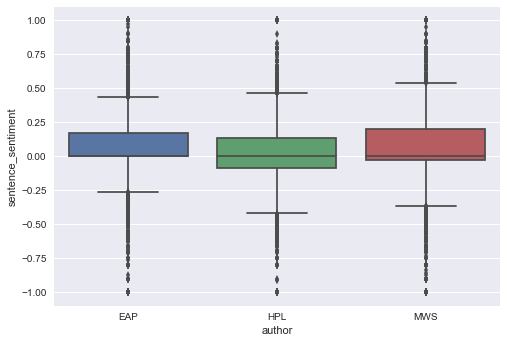

In [22]:
# 看看箱线图，有一点点差距，不知道统计上显著不显著，可以做一下假设检验，用scipy
sns.boxplot(x=train_data.author,y=train_data.sentence_sentiment)
plt.show()

In [23]:
# 接下来看看每个句子的主客观程度
train_data['sub_obj'] = train_data.text.apply(lambda x:TextBlob(x).sentiment[1])

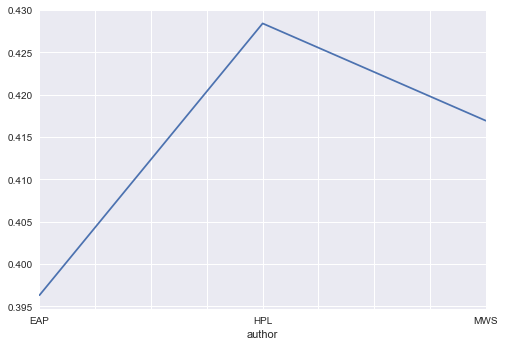

In [25]:
# 这个看起来还是比较显著的，但依然需要做假设检验
train_data.groupby(train_data.author).sub_obj.mean().plot()
plt.show()

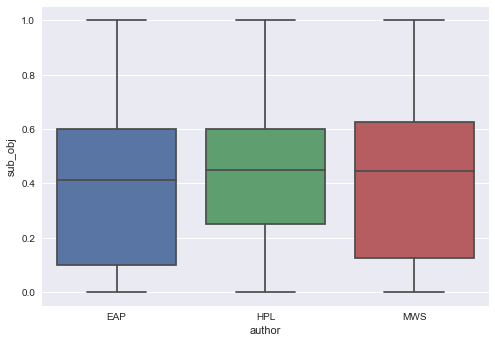

In [26]:
sns.boxplot(x=train_data.author,y=train_data.sub_obj)
plt.show()

### 然后我想做做基于每个单词的情感分析

In [6]:
all_word = []
symbol = [',','.',':',';','?','!','"']
for i in train_data.word_split:
    for j in i:
        if j not in symbol:
            all_word.append(j)

In [58]:
d = {}
for i in all_word:
    d[i]=TextBlob(i).sentiment[1]

In [59]:
s = 0
for i in d:
    if d[i]!=0:
        s+=1
s

1632

###  想用textblob做一个单词的情感分析，但是能识别出情感的只有1632个词语，不知道要不要继续

In [60]:
def pos_num(x):
    s=0
    for i in x:
        if i not in symbol:
            if d[i]>0:
                s+=1
    return s
train_data['pos_word_num'] = train_data.word_split.apply(lambda x:pos_num(x))

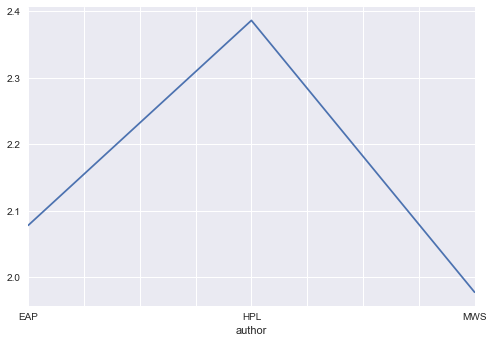

In [61]:
train_data.groupby(train_data.author).pos_word_num.mean().plot()
plt.show()

In [62]:
train_data.groupby(train_data.author).pos_word_num.sum()/train_data.groupby(train_data.author).pos_word_num.count()

author
EAP    2.077975
HPL    2.386513
MWS    1.977333
Name: pos_word_num, dtype: float64

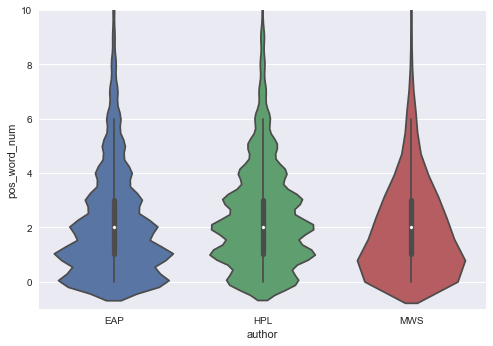

In [65]:
sns.violinplot(x=train_data.author,y=train_data.pos_word_num)
plt.ylim(-1,10)
plt.show()
#去除几个极值后几乎没什么区别

In [80]:
train_data['pos_density'] = train_data.pos_word_num/train_data.text_len

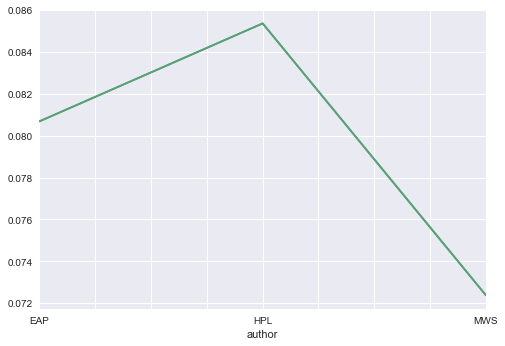

In [84]:
train_data.groupby(train_data.author).pos_density.mean().plot()
plt.show(0)

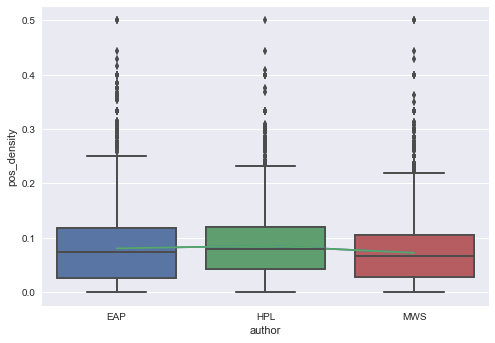

In [86]:
sns.boxplot(x=train_data.author,y=train_data.pos_density)
plt.show()

### 用textblob好像没什么好结果，用密度的话好像稍微好一点，但还是不够好

In [66]:
def neg_num(x):
    s=0
    for i in x:
        if i not in symbol:
            if d[i]<0:
                s+=1
    return s
train_data['neg_word_num'] = train_data.word_split.apply(lambda x:pos_num(x))

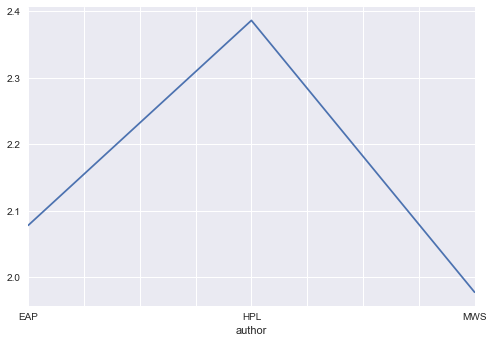

In [67]:
train_data.groupby(train_data.author).neg_word_num.mean().plot()
plt.show()

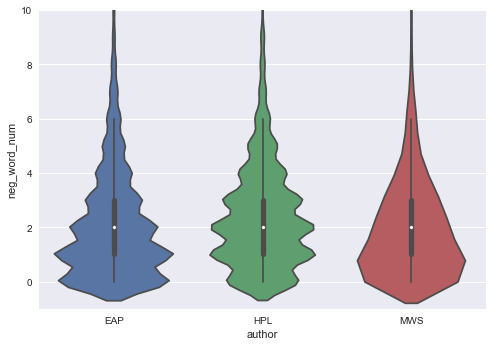

In [69]:
sns.violinplot(x=train_data.author,y=train_data.neg_word_num)
plt.ylim(-1,10)
plt.show()
#一样没有影响，所以看看极值本身，另外再看看有没有别的情感分类的词库

In [87]:
train_data['neg_density'] = train_data.neg_word_num/train_data.text_len

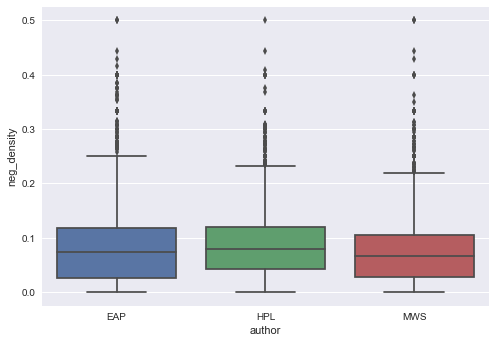

In [88]:
sns.boxplot(x=train_data.author,y=train_data.neg_density)
plt.show()

### 一篇kernel里提到一种新的情感分析软件包，ANIFF和NCR，NCR只有R语言的包，可能就不用了

In [6]:
from afinn import Afinn

In [8]:
af = Afinn()

In [18]:
train_data['sentence_sentiment_afinn'] = train_data.text.apply(lambda x:af.score(x))

In [24]:
train_data['sentence_sentiment_word_num'] = train_data.text.apply(lambda x:len(af.scores(x)))

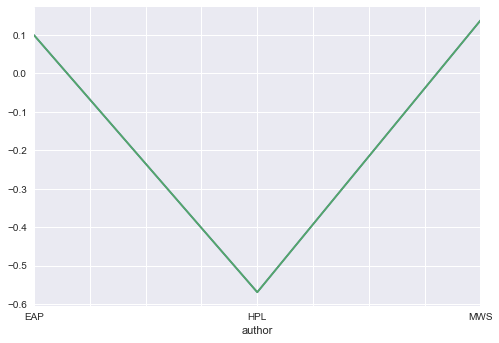

In [21]:
train_data.groupby(train_data.author).sentence_sentiment_afinn.mean().plot()
plt.show()

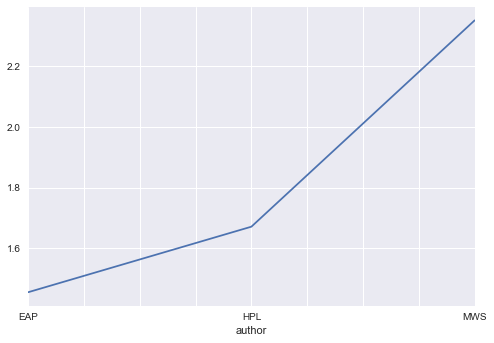

In [26]:
train_data.groupby(train_data.author).sentence_sentiment_word_num.mean().plot()
plt.show()

In [78]:
eap_word = []
for i in train_data[train_data.author=='EAP'].word_split:
    for j in i:
        eap_word.append(j)

In [79]:
eap_word = list(set(eap_word))

In [80]:
eap_word_sentiment = []
for i in eap_word:
    eap_word_sentiment.append(af.score(i))

In [81]:
a = [[],[]]
for i in range(20):
    index = eap_word_sentiment.index(max(eap_word_sentiment))
    a[0].append(eap_word[index])
    a[1].append(eap_word_sentiment[index])             
    eap_word_sentiment[index] = 0 

In [83]:
b = [[],[]]
for i in range(20):
    index = eap_word_sentiment.index(min(eap_word_sentiment))
    b[0].append(eap_word[index])
    b[1].append(eap_word_sentiment[index])
    eap_word_sentiment[index] = 0 

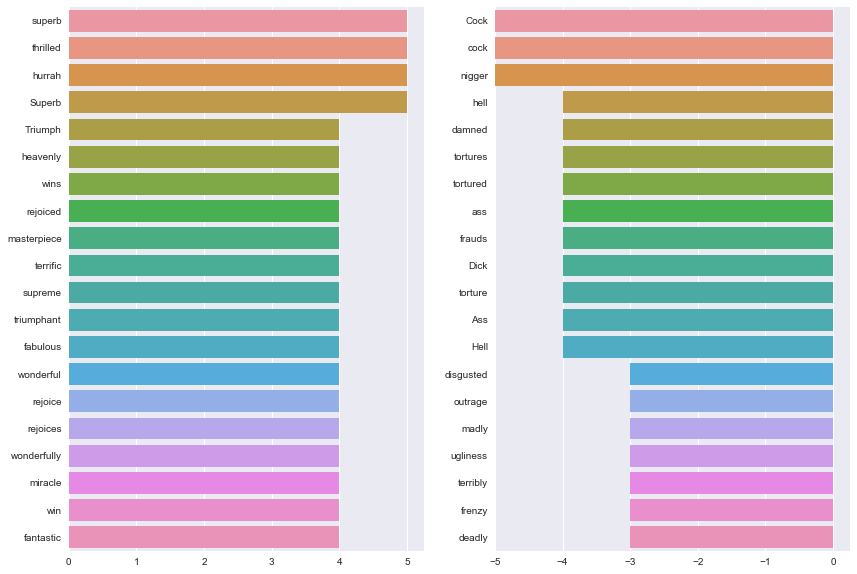

In [87]:
f = plt.figure(figsize=(14,10))
ax1 = f.add_subplot(121)
sns.barplot(y=a[0],x=a[1],ax=ax1)
ax2 = f.add_subplot(122)
sns.barplot(y=b[0],x=b[1],ax=ax2)
plt.show()

In [92]:
hpl_word = []
for i in train_data[train_data.author=='HPL'].word_split:
    for j in i:
        hpl_word.append(j)
hpl_word = list(set(hpl_word))
hpl_word_sentiment = []
for i in hpl_word:
    hpl_word_sentiment.append(af.score(i))
a = [[],[]]
for i in range(20):
    index = hpl_word_sentiment.index(max(hpl_word_sentiment))
    a[0].append(hpl_word[index])
    a[1].append(hpl_word_sentiment[index])             
    hpl_word_sentiment[index] = 0 
b = [[],[]]
for i in range(20):
    index = hpl_word_sentiment.index(min(hpl_word_sentiment))
    b[0].append(hpl_word[index])
    b[1].append(hpl_word_sentiment[index])
    hpl_word_sentiment[index] = 0 

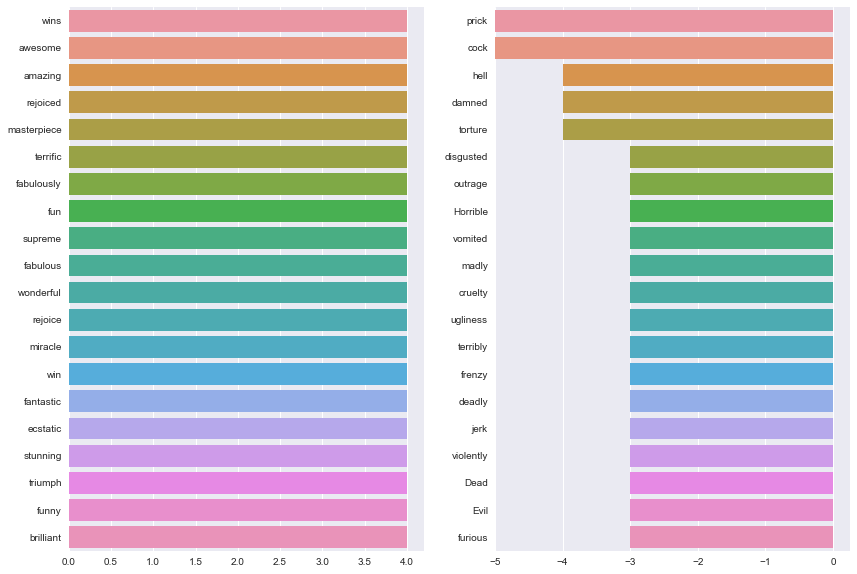

In [93]:
f = plt.figure(figsize=(14,10))
ax1 = f.add_subplot(121)
sns.barplot(y=a[0],x=a[1],ax=ax1)
ax2 = f.add_subplot(122)
sns.barplot(y=b[0],x=b[1],ax=ax2)
plt.show()

In [94]:
mws_word = []
for i in train_data[train_data.author=='MWS'].word_split:
    for j in i:
        mws_word.append(j)
mws_word = list(set(mws_word))
mws_word_sentiment = []
for i in mws_word:
    mws_word_sentiment.append(af.score(i))
a = [[],[]]
for i in range(20):
    index = mws_word_sentiment.index(max(mws_word_sentiment))
    a[0].append(mws_word[index])
    a[1].append(mws_word_sentiment[index])             
    mws_word_sentiment[index] = 0 
b = [[],[]]
for i in range(20):
    index = mws_word_sentiment.index(min(mws_word_sentiment))
    b[0].append(mws_word[index])
    b[1].append(mws_word_sentiment[index])
    mws_word_sentiment[index] = 0 

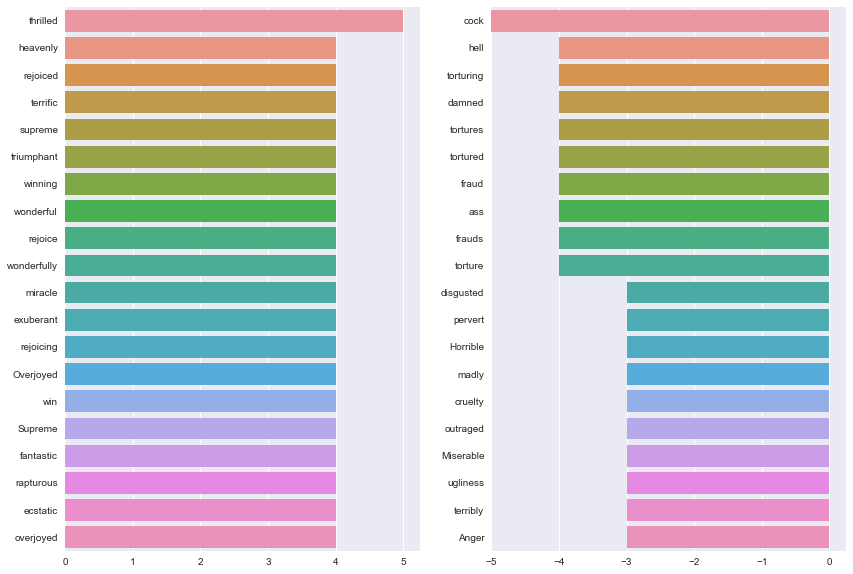

In [95]:
f = plt.figure(figsize=(14,10))
ax1 = f.add_subplot(121)
sns.barplot(y=a[0],x=a[1],ax=ax1)
ax2 = f.add_subplot(122)
sns.barplot(y=b[0],x=b[1],ax=ax2)
plt.show()

#### 用afinn后三个作者的情感倾向还是有很大差异的，HPL是唯一一个整体情感是消极的作者。看他的具体用词可以看出，他不会用5分的积极词。然后比较他们的消极词，有一些词语是独有的，比如说rigger，ass，fraud。

#### topic model在另一篇notebook里实现了，但效果好像不太好